# Basic pendulum animations: using %matplotlib notebook

Use Pendulum class to generate basic pendulum animations.  Uses the `%matplotlib notebook` backend for Jupyter notebooks to display the animation as real-time updates with `animation.FuncAnimation` (as opposed to making a movie, see the pendulum_animation_notebook_inline versions for an alternative).

* v1: Created 25-Jan-2019.  Last revised 27-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
#%matplotlib inline

In [2]:
%matplotlib notebook

In [3]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [4]:
plt.rcParams['figure.dpi'] = 100.  # this is the default

## Pendulum class and utility functions

In [5]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

In [6]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [7]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Plots to animate

In [8]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.077
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


## Demo animation

<IPython.core.display.Javascript object>


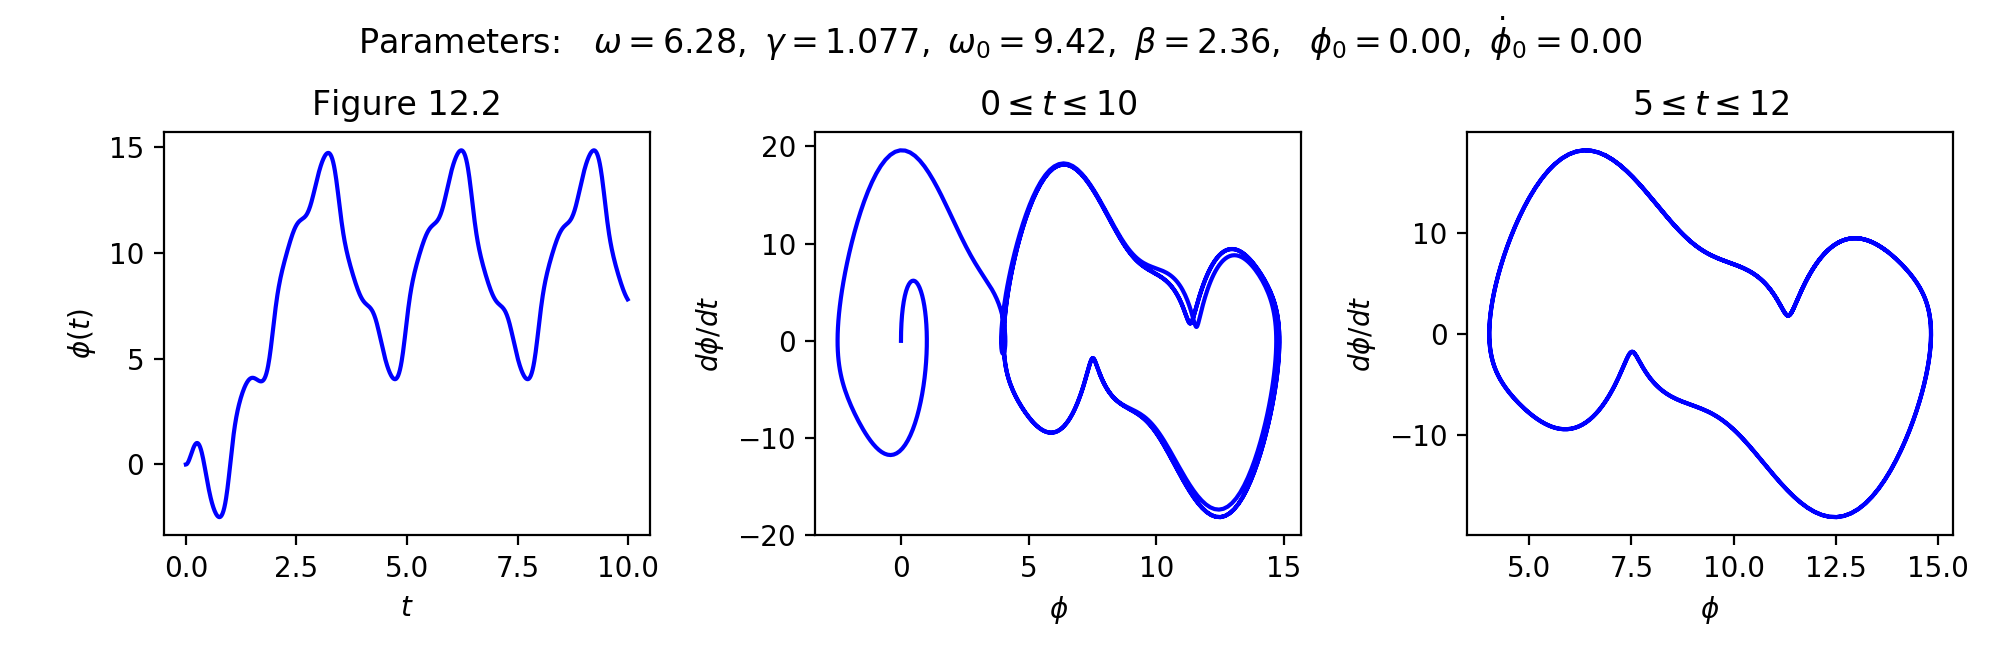

In [9]:
# initial conditions specified
phi_0 = 0.0  # -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 10
plt.rcParams.update({'font.size': font_size})

# start the plot!
overall_title = 'Parameters:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig = plt.figure(figsize=(10,3.3), num='Pendulum Plots')
fig.suptitle(overall_title, va='top')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.2', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=10   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 10.)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 10$', 
            ax=ax_b)    

# third plot: state space plot from t=5 to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 5., 12.)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$5 \leq t \leq 12$', 
            ax=ax_c)    

fig.tight_layout()
fig.subplots_adjust(top=0.8)
fig.savefig('Figure_Pendulum_plots.png', bbox_inches='tight')  # always bbox_inches='tight'

In [10]:
def animate_pendulum(i, t_pts, phi_1, phi_dot_1):
    pt_1.set_data(t_pts[i], phi_1[i])

    line_2.set_data([phi_1[i], phi_1[i]], [0.,length])
    pt_2.set_data(phi_1[i], length)
    phi_string = rf'$\phi = {phi_1[i]:.1f}$'
    phi_text.set_text(phi_string)

    pt_3.set_data(phi_1[i], phi_dot_1[i])

    return pt_1, pt_2, phi_text, pt_3

<IPython.core.display.Javascript object>


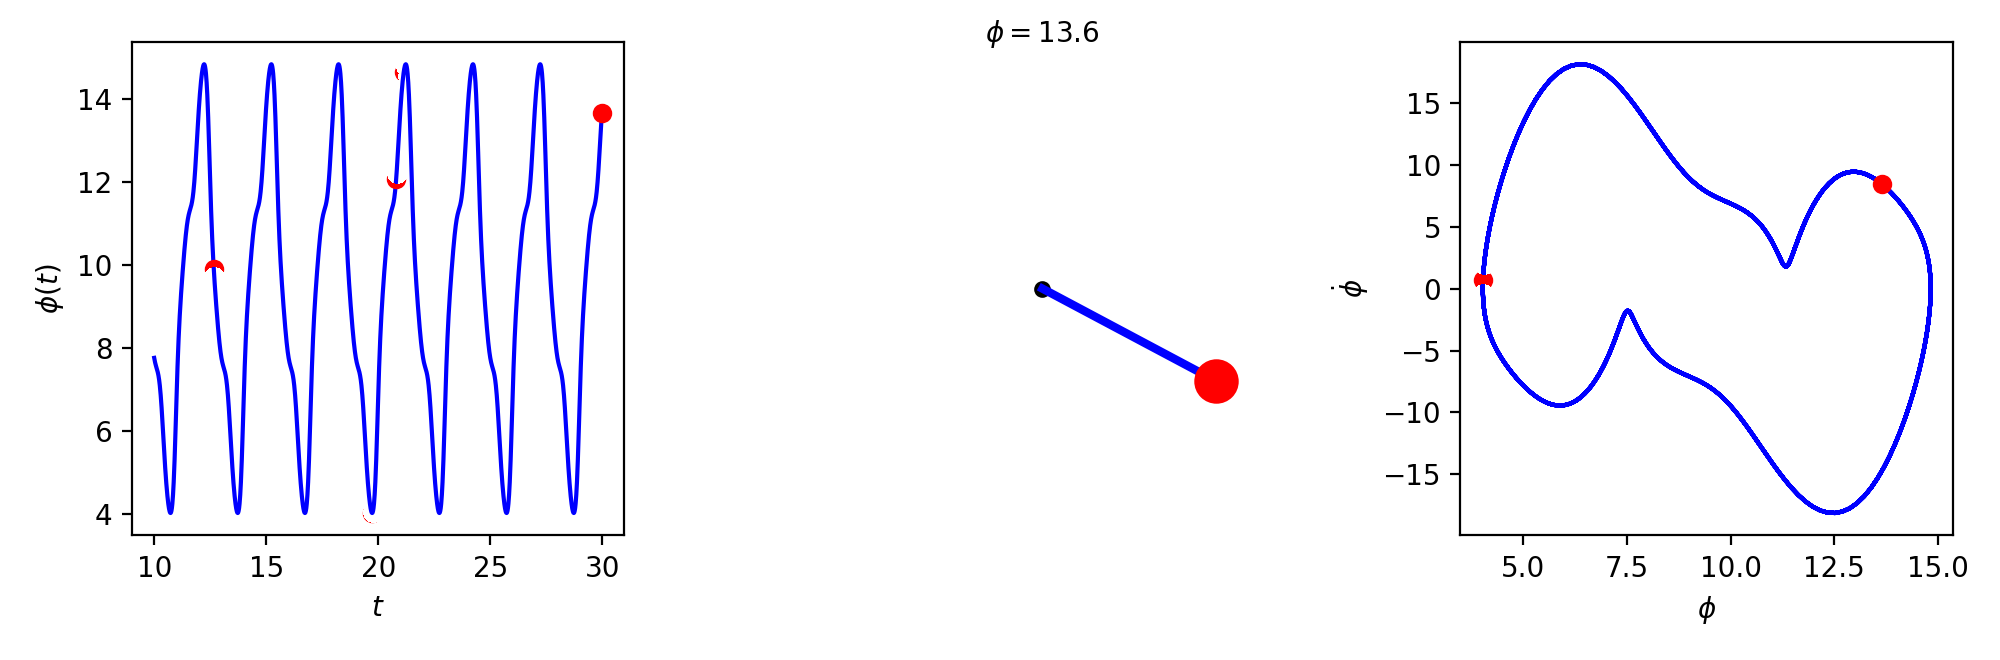

In [13]:
#%%capture    
start, stop = start_stop_indices(t_pts, 10., 30.)    

fig_new = plt.figure(figsize=(10, 3.3), num='Pendulum animation')
ax_1 = fig_new.add_subplot(1,3,1)

line_1, = ax_1.plot(t_pts[start : stop], phi_1[start : stop], color='blue')
pt_1, = ax_1.plot(t_pts[start], phi_1[start], 'o', color='red')
ax_1.set_xlabel(r'$t$')
ax_1.set_ylabel(r'$\phi(t)$')


ax_2 = fig_new.add_subplot(1,3,2, projection='polar')
ax_2.set_aspect(1)   # aspect ratio 1 subplot
ax_2.set_rorigin(0.)   # origin in the middle
ax_2.set_theta_zero_location('S')  # phi=0 at the bottom
ax_2.set_ylim(-1.,1.)  # r goes from 0 to 1
ax_2.grid(False)   # no longitude/lattitude lines
ax_2.set_xticklabels([])   # turn off angle labels
ax_2.set_yticklabels([])    # turn off radial labels
ax_2.spines['polar'].set_visible(False) # no circular border

length = 0.8
ax_2.plot(0, 0, color='black', marker='o', markersize=5)
line_2, = ax_2.plot([phi_1[start], phi_1[start]], [0.,length], 
                    color='blue', lw=3)
pt_2, = ax_2.plot(phi_1[start], length, 
                  marker='o', markersize=15, color='red')
phi_string = rf'$\phi = {phi_1[start]:.1f}$'
phi_text = ax_2.text(np.pi, 1., phi_string, horizontalalignment='center')


ax_3 = fig_new.add_subplot(1,3,3)
line_3, = ax_3.plot(phi_1[start : stop], phi_dot_1[start : stop], 
                    color='blue')
pt_3, = ax_3.plot(phi_1[start], phi_dot_1[start], 'o', color='red')
ax_3.set_xlabel(r'$\phi$')
ax_3.set_ylabel(r'$\dot\phi$')

fig_new.tight_layout()

#plt.rcParams["animation.embed_limit"] = 50.0   # max size of animation in MB

skip = 2        # skip between points in t_pts array
interval = 25  # time between frames in milliseconds
anim = animation.FuncAnimation(fig_new, animate_pendulum, 
                               fargs=(t_pts[start:stop:skip], 
                                      phi_1[start:stop:skip],
                                      phi_dot_1[start:stop:skip]), 
                               init_func=None,
                               frames=len(t_pts[start:stop:skip]), 
                               interval=interval, 
                               blit=True, repeat=False,
                               save_count=0)

#HTML(anim.to_jshtml())
fig_new.show()
